In [1]:
from eiscirc import ImpedanceModel
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Test with letter-labeled components
model = ImpedanceModel("R0-Rs//CPEa-R2//C2")
print(model.bounds["CPEa_alpha"])
print(model.get_bounds("CPEa_alpha"))  # (0.001, 1.0)
print(model.get_bounds("Rs"))  # (1e-3, 1e6)
print(model.get_bounds("C2"))  # (1e-12, 1e-2)

# Set and get custom bounds
#model.set_bounds(CPEa_alpha=(0.01, 0.99))
model.bounds["CPEa_alpha"]=(0.21, 0.99)
print(model.get_bounds("CPEa_alpha"))  # (0.01, 0.99)

# Still works with numbered components
model2 = ImpedanceModel("R1-CPE1")
print(model2.get_bounds("CPE1_alpha"))  # (0.001, 1.0)

(0.001, 1.0)
(0.001, 1.0)
(0.001, 1000000.0)
(1e-12, 0.01)


AttributeError: 'ImpedanceModel' object has no attribute 'C2'

In [11]:
model = ImpedanceModel("R0-Rs//CPEa-R2//C2")
model.params.CPEa.alpha

AttributeError: No such sub-parameter 'alpha'

In [6]:
model = ImpedanceModel("R1-CPE1")
print (model.get_bounds("CPE1_value"))

# Set custom bounds
#model.set_bounds(CPE1_alpha=(0.0, 1.0))

# Verify bounds enforcement
try:
    model.params.CPE1.alpha = 1.5
    #model.params.CPE1_alpha = 1.5  # Should raise ValueError
    #model.set_params (CPE1_alpha = 1.5)  # Should raise ValueError
except ValueError as e:
    print(f"Correctly caught: {e}")

# Check bounds access
print(model.get_bounds("CPE1_alpha"))  # (0.0, 1.0)
print(model.bounds["CPE1_alpha"])  # (0.0, 1.0)

# Global defaults remain unchanged
model2 = ImpedanceModel("R1-CPE1")
print(model2.get_bounds("CPE1_alpha"))  # Original bounds from PARAMETER_CONFIG

(1e-12, 0.01)
Correctly caught: CPE1_alpha must be in [0.001, 1.0], got 1.5
(0.001, 1.0)
(0.001, 1.0)
(0.001, 1.0)


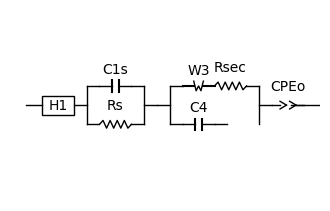

['H1', 'Rs', 'C1s', 'C4', 'W3', 'Rsec', 'CPEo']

In [3]:
model = ImpedanceModel("H1-Rs//C1s-C4//(W3-Rsec)-CPEo")
fig = model.draw_circuit(size=(4, 3))
plt.show()
model.param_names
#model.Z_imag

C:\Users\mlp\My Projects\github\eiscirc\eiscirc\circuit_parser.py:552: RuntimeWarning: overflow encountered in tanh
  return lambda omega, **params: params[structure][0] * np.tanh( params[structure][1] * np.sqrt(1j * omega) ) / np.sqrt(1j * omega)


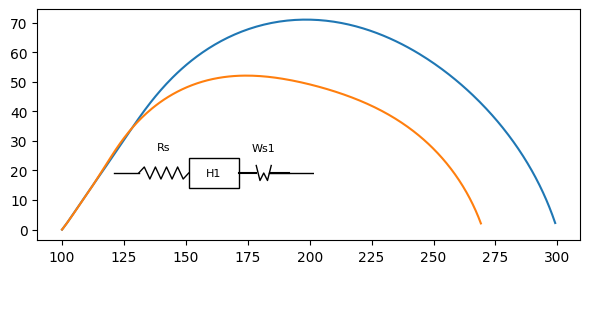

In [9]:
model = ImpedanceModel("Rs-H1-Ws1")
model.set_params(Rs=100)
omega = 2 * np.pi * np.logspace(-3, 8, 1000)  # 10 Hz to 1 MHz in rad/s

fig, ax = plt.subplots(figsize=(7, 3))
# Add circuit as inset
model.draw_circuit(ax=ax,position=[3, 3], loc = 2)

Z = model.impedance(omega)
ax.plot(model.Z_real, -model.Z_imag)

model.params.Ws1.tau = 0.7
#model.set_params(Ws1={"tau":0.7})
#model.set_params(Ws1=(100.,0.5))
#model.set_params(Ws1_tau=0.7)

#model.set_params(**{'Ws1.tau': 0.7}) #### DOES NOT WORK
#model.set_params(Ws1.tau=0.7) #### DOES NOT WORK

Z = model.impedance(omega)
ax.plot(model.Z_real, -model.Z_imag)


None
None
None


C:\Users\mlp\AppData\Local\Temp\ipykernel_19692\1892381891.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


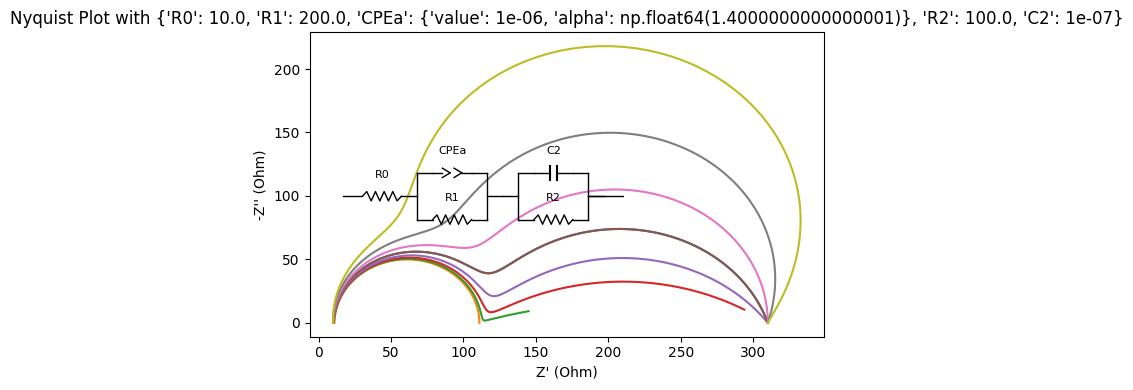

In [6]:
model = ImpedanceModel("R0-R1//CPEa-R2//C2")
print(model.get_bounds("CPEa_alpha"))  # (0.0, 1.0)
print(model.bounds["CPEa_alpha"]) 
omega = 2 * np.pi * np.logspace(-3, 8, 1000)  # 10 Hz to 1 MHz in rad/s

### Keyword input
Z = model.impedance(omega, R0=1e1, R1=2e2, CPEa=(1e-6,0.8), R2=1e2, C2=1e-7)

R0=1e1; R1=2e2; CPEa=(1e-6,0.8); R2=1e2; C2=1e-7
#### Array input
Z = model.impedance(omega, [R0, R1, CPEa, R2, C2])

#### Dictionary input
params = {'R0':R0, 'R1':R1, 'C2':C2, 'CPEa':CPEa, "R2":R2}
Z = model.impedance(omega, params)

fig, ax = plt.subplots(figsize=(6, 4))
# Add circuit as inset
model.draw_circuit(ax=ax,position=[3, 3], loc = 2)

ax.plot(model.Z_real, -model.Z_imag)
print(model.bounds["CPEa_alpha"]) 
model.set_bounds(CPEa_alpha=(0.0, 1.))  # Sub-parameter

model.set_params(CPEa_alpha=1.4)

for x in np.arange(0.,1.5,0.2):
    #model.params.CPEa_alpha=x
    model.set_params(CPEa_alpha=x)
    #model.set_params(CPEa={"alpha":x})
    #model.set_params(**{"CPEa_alpha":x})

    Z = model.impedance(omega)
    ax.plot(model.Z_real, -model.Z_imag)

ax.set_xlabel('Z\' (Ohm)')
ax.set_ylabel('-Z\'\' (Ohm)')
ax.set_title('Nyquist Plot with %s'%(model._params))
plt.tight_layout()
plt.show()

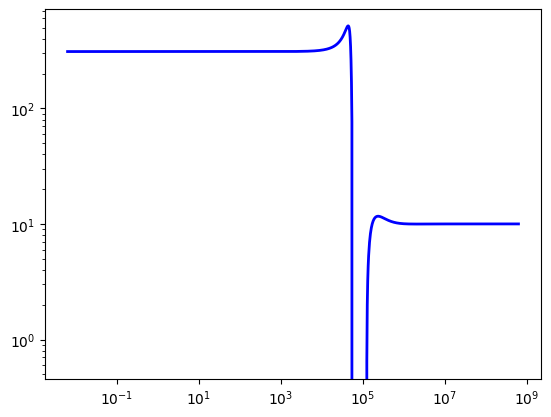

In [22]:
plt.loglog(omega, model.Z_real, 'b-', linewidth=2)